<center><h1>
תרגול 2 - חזרה על הסתברות וחיזוי
</h1></center>

## Setup

In [ ]:
## Importing packages
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package
import imageio  # A package to read and write image (is used here to save gif images)

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

## Setting some nice matplotlib defaults
plt.rcParams['figure.figsize'] = (4.5, 4.5)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Auxiliary function for prining equations, pandas tables and images in cells output
from IPython.core.display import display, HTML, Latex, Image

## Patients Distribution Model

### Pulse vs Number of Coughs

| .             | $\text{c}=0$ | $\text{c}=1$ | $\text{c}=2$ | $\text{c}=3$ |
| ------------- | :----------: | :----------: | :----------: | :----------: |
| $\text{p}=50$ | 0            | 0.15         | 0.2          | 0.05         |
| $\text{p}=60$ | 0.08         | 0.03         | ???          | 0.04         |
| $\text{p}=70$ | 0.02         | 0.03         | 0.04         | 0.01         |
| $\text{p}=80$ | 0.1          | 0.05         | 0.05         | 0.1          |

In [ ]:
## P_{X,Y} joint distribution
## --------------------------
p_values = np.array([50, 60, 70, 80])
c_values = np.array([0, 1, 2, 3])
p_pc = pd.DataFrame([[0   , 0.15, 0.2   , 0.05],
                     [0.08, 0.03, np.nan, 0.04],
                     [0.02, 0.03, 0.04  , 0.01],
                     [0.1 , 0.05, 0.05  , 0.1 ]],
                     index=p_values,
                     columns=c_values)
display(HTML(p_pc.to_html()))

,0,1,2,3
50,0.00,0.15,0.20,0.05
60,0.08,0.03,NaN,0.04
70,0.02,0.03,0.04,0.01
80,0.10,0.05,0.05,0.10


## Ex. 2.2

### Sec. 2.2.1
Calculating $p_{\text{p},\text{c}}(60,2)$

In [ ]:
p_pc.loc[60, 2] = 1 - np.nansum(p_pc)
display(
    Latex(r'$p_{\text{p},\text{c}}(60,2)=' + f'{p_pc.loc[60, 2]:.3}$'),
    Latex(r'$p_{\text{p},\text{c}}$:'),
    HTML(p_pc.to_html()),
    )

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

,0,1,2,3
50,0.00,0.15,0.20,0.05
60,0.08,0.03,0.05,0.04
70,0.02,0.03,0.04,0.01
80,0.10,0.05,0.05,0.10


### Sec. 2.2.2
Calculating $p_{\text{p}\lvert\text{c}}(60\lvert \text{c}=0)$

In [ ]:
p_p_60_given_c_0 = p_pc.loc[60, 0] / p_pc.loc[:, 0].sum()
display(Latex(r'$p_{\text{p},\text{c}}(1|50)=' + f'{p_p_60_given_c_0:.3}$'))

<IPython.core.display.Latex object>

### sec. 2.2.3

Calculating $p_{\text{p}}$

In [ ]:
p_p = p_pc.sum(axis=1)
display(
    Latex(r'$p_{\text{p}}(p)$:'),
    HTML(p_p.to_frame().to_html())
    )

<IPython.core.display.Latex object>

,0
50,0.4
60,0.2
70,0.1
80,0.3


Calculating $\text{Pr}(\text{p}_1\geq70\cup\text{p}_2\geq70\cup\ldots\cup\text{p}_{10}\geq70)$

In [ ]:
prob = p_p[p_values >= 70].sum() ** 10
display(Latex(r'$\text{Pr}(\text{p}_1\geq70\cup\text{p}_2\geq70\cup\ldots\cup\text{p}_{10}\geq70)=' + f'{prob:.3}$'))

<IPython.core.display.Latex object>

## Ex 2.3

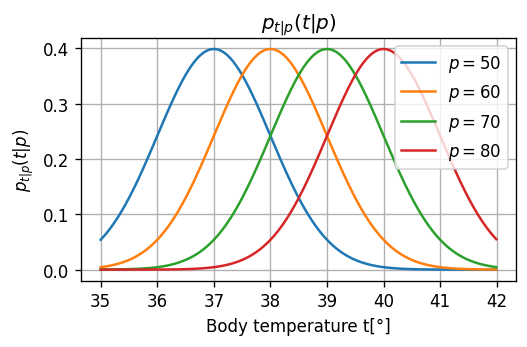

In [ ]:
## Import the normal distribution model from SciPy
from scipy.stats import norm

temp_grid = np.arange(35, 42, 0.01)
sigma = 1
p_t_given_p_dist = {p: norm(32 + 0.1 * p, sigma) for p in p_values}
p_t_given_p = lambda t, p: p_t_given_p_dist[p].pdf(t)

## Ploting
fig, ax = plt.subplots(figsize=(4.5, 3))
ax.set_title(r'$p_{t|p}(t|p)$')
for p in p_values:
    ax.plot(temp_grid, p_t_given_p(temp_grid, p), label=f'$p={p}$')
ax.set_xlabel('Body temperature t[°]')
ax.set_ylabel(r'$p_{t|p}(t|p)$')
ax.legend(loc='upper right')
plt.tight_layout()
fig.savefig('./assets/dist_t_given_p.png')

Calculating $p_{\text{t},\text{p}}(t,p)=p_{\text{t}|\text{p}}(t|p)p_{\text{p}}(p)$

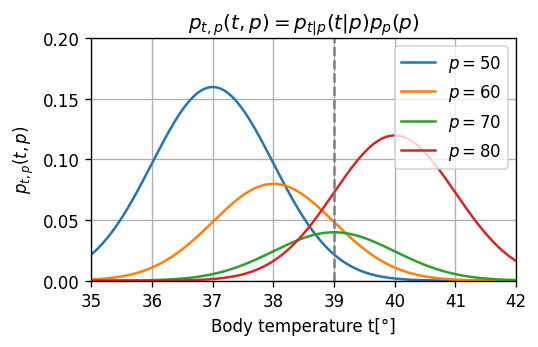

In [ ]:
p_tp = lambda t, p: p_t_given_p(t, p) * p_p[p]

## ploting
fig, ax = plt.subplots(figsize=(4.5, 3))
ax.set_title(r'$p_{t,p}(t,p)=p_{t|p}(t|p)p_{p}(p)$')
for p in p_values:
    ax.plot(temp_grid, p_tp(temp_grid, p), label=f'$p={p}$')
ax.set_xlabel('Body temperature t[°]')
ax.set_ylabel(r'$p_{t,p}(t,p)$')
ax.plot([39, 39], [0, 0.2], '--', color='gray')
ax.legend(loc='upper right')
plt.tight_layout()
ax.set_xlim(35, 42)
ax.set_ylim(0, 0.2)
fig.savefig('./assets/dist_tp.png')

In [ ]:
p_tp_t_39 = pd.Series([p_tp(39, p) for p in p_values], index=p_values)

display(
    Latex(r'$p_{\text{t},\text{p}}(39,p)$:'),
    HTML(p_tp_t_39.to_frame().to_html()),
    )

<IPython.core.display.Latex object>

,0
50,0.021596
60,0.048394
70,0.039894
80,0.072591


Calculating $p_{\text{t}}(t)=\sum_p p_{\text{t},\text{p}}(t,p)$

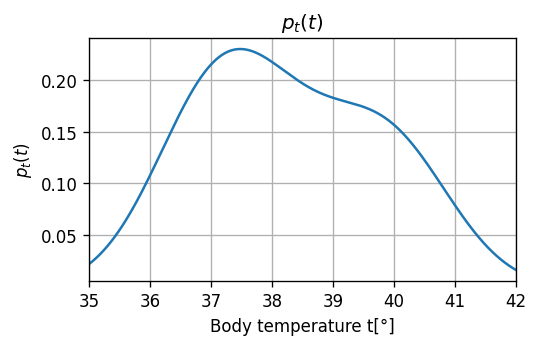

In [ ]:
p_t = lambda t: np.stack([p_tp(t, p) for p in p_values], axis=0).sum(axis=0)

## ploting
fig, ax = plt.subplots(figsize=(4.5, 3))
ax.set_title(r'$p_t(t)$')
ax.plot(temp_grid, p_t(temp_grid));
ax.set_xlabel('Body temperature t[°]')
ax.set_ylabel(r'$p_t(t)$')
plt.tight_layout()
ax.set_xlim(35, 42)
fig.savefig('./assets/dist_t.png')

In [ ]:
p_39 = p_t(39)

display(Latex(r'$p_\text{t}(39)=' + f'{p_39:.3}$'))

<IPython.core.display.Latex object>

Calculating $p_{\text{p}|\text{t}}(t|p)=\frac{p_{\text{t},\text{p}}(t,p)}{p_{\text{t}}(t)}$

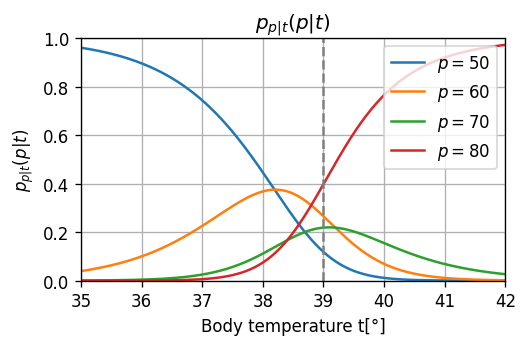

In [ ]:
p_p_given_t = lambda p, t: p_tp(t, p) / p_t(t)

fig, ax = plt.subplots(figsize=(4.5, 3))
ax.set_title(r'$p_{p|t}(p|t)$')
for p in p_values:
    ax.plot(temp_grid, p_p_given_t(p, temp_grid), label=f'$p={p}$')
ax.set_xlabel('Body temperature t[°]')
ax.set_ylabel(r'$p_{p|t}(p|t)$')
ax.plot([39, 39], [0, 1], '--', color='gray')
ax.legend(loc='upper right')
ax.set_xlim(35, 42)
ax.set_ylim(0, 1)
plt.tight_layout()
fig.savefig('./assets/dist_p_given_t.png')

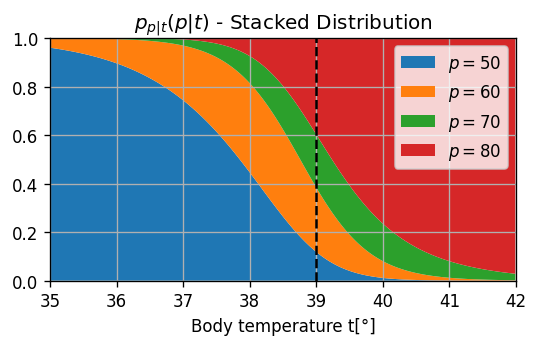

In [ ]:
fig, ax = plt.subplots(figsize=(4.5, 3))
ax.set_title(r'$p_{p|t}(p|t)$ - Stacked Distribution')
ax.stackplot(temp_grid, np.stack([p_p_given_t(p, temp_grid) for p in p_values], axis=0),
             labels=[f'$p={p}$' for p in p_values])
ax.set_xlabel('Body temperature t[°]')
ax.plot([39, 39], [0, 1], '--', color='black')
ax.legend(loc='upper right')
plt.tight_layout()
ax.set_xlim(35, 42)
ax.set_ylim(0, 1)
fig.savefig('./assets/dist_p_given_t_stack.png')

In [ ]:
p_p_given_t_39 = pd.Series([p_p_given_t(p, 39) for p in p_values], index=p_values)

display(
    Latex(r'$p_{\text{p}|\text{t}}(p|39)$:'),
    HTML(p_p_given_t_39.to_frame().to_html()),
    )

<IPython.core.display.Latex object>

,0
50,0.118352
60,0.265208
70,0.218627
80,0.397812
